### Import Library and dataset

In [1]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/algonacci/Data-Warehouse/main/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

C:\Users\Vulcan\AppData\Local\Temp/ipykernel_10148/2500067087.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


In [2]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

### Splitting the data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

### Make the model

In [4]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [5]:
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8673965936739659


In [6]:
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion matrix:
[[1920  164]
 [ 163  219]]


In [8]:
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

       False       0.92      0.92      0.92      2084
        True       0.57      0.57      0.57       382

    accuracy                           0.87      2466
   macro avg       0.75      0.75      0.75      2466
weighted avg       0.87      0.87      0.87      2466



In [9]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('Positive', 'Negative'), ('Positive', 'Negative'))

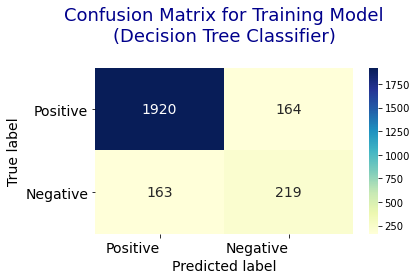

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.tree import export_graphviz

dot_file = 'decision_tree.dot'

export_graphviz(model, out_file=dot_file, feature_names=X_train.columns.values)

In [15]:
dot -Tpng decision_tree.dot -o decision_tree.png

SyntaxError: invalid syntax (Temp/ipykernel_10148/164051955.py, line 1)